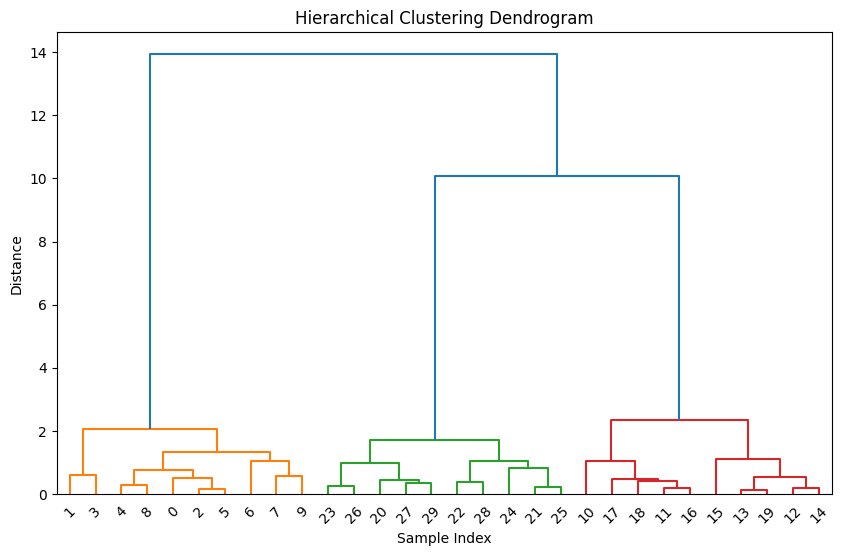

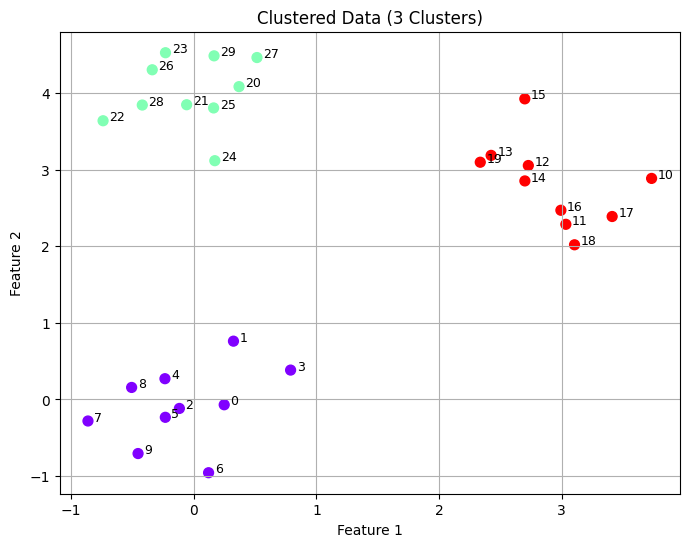

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
 
# 1. Generate some sample 2D data

np.random.seed(42)

X = np.vstack([

    np.random.normal(loc=[0, 0], scale=0.5, size=(10, 2)),

    np.random.normal(loc=[3, 3], scale=0.5, size=(10, 2)),

    np.random.normal(loc=[0, 4], scale=0.5, size=(10, 2))

])
 
# X
 
# 2. Perform hierarchical clustering using Ward's method

Z = linkage(X, method='ward')  # This is the aggregation step
 
# 3. Plot the dendrogram

plt.figure(figsize=(10, 6))

dendrogram(Z)

plt.title('Hierarchical Clustering Dendrogram')

plt.xlabel('Sample Index')

plt.ylabel('Distance')

plt.show()
 
# 4. Extract flat clusters (e.g., 3 clusters)

labels = fcluster(Z, t=3, criterion='maxclust')   #t=3 ,this means:→ "Cut the dendrogram to form exactly 3 clusters.", “From this hierarchical clustering tree (Z), cut it to form exactly 3 clusters.”

# Imagine the hierarchical clustering tree (dendrogram) built by linkage().

# The tree starts with each data point in its own cluster and merges clusters step by step until everything is in one cluster.

# Now, to "flatten" this into 3 clusters, you can cut the tree horizontally at a height that results in exactly 3 clusters below that cut.
 
# When criterion='maxclust', fcluster():

# Traverses the linkage tree from the bottom up.

# Finds the cut height where the number of resulting clusters equals t.

# Assigns a unique label (1, 2, ..., t) to each cluster.

# Finds the height (distance) where cutting the dendrogram produces 3 separate groups

labels
 
# 5. Visualize the clusters

plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=50) #c=labels, this sets the color of each point according to its cluster label.

# Optional: label the points

for i, (x, y) in enumerate(X):

    plt.text(x + 0.05, y, str(i), fontsize=9)

plt.title('Clustered Data (3 Clusters)')

plt.xlabel('Feature 1')

plt.ylabel('Feature 2')

plt.grid(True)

plt.show()

 

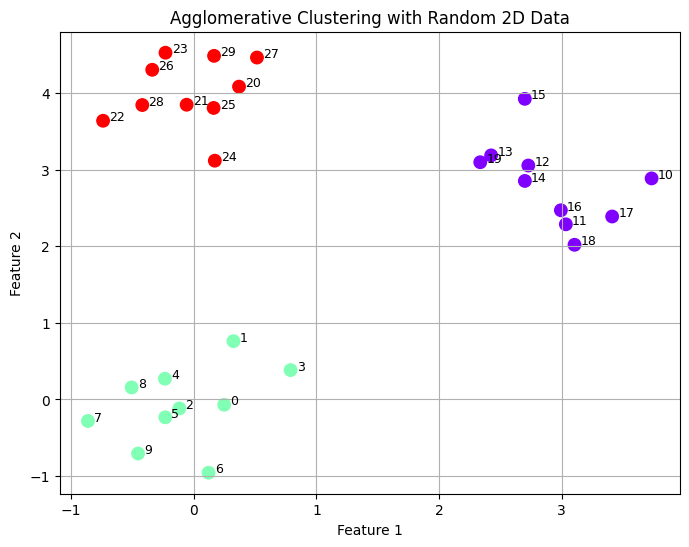

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
 
# 1. Generate some sample 2D data
np.random.seed(42)
X = np.vstack([
    np.random.normal(loc=[0, 0], scale=0.5, size=(10, 2)),
    np.random.normal(loc=[3, 3], scale=0.5, size=(10, 2)),
    np.random.normal(loc=[0, 4], scale=0.5, size=(10, 2))
])
 
# 2. Create Agglomerative Clustering model
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit(X)
 
# 3. Get cluster labels
labels = model.labels_
labels
 
# 4. Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=80)
 
# Optional: label the points
for i, (x, y) in enumerate(X):
    plt.text(x + 0.05, y, str(i), fontsize=9)
 
plt.title('Agglomerative Clustering with Random 2D Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()